In [1]:
import matplotlib.pyplot as plt
import pandas
from pandas import *

In [2]:
data_frame: DataFrame = pandas.read_csv('data/results.csv')

# Plotting a line chart of the scores of England team over time, when England played as a home team between 1872 and 1882

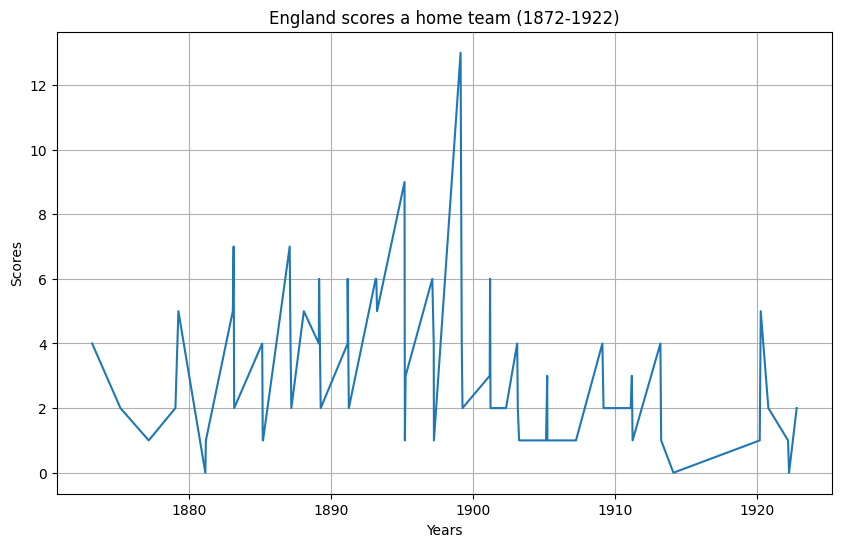

In [3]:
def line() -> None:
    data_frame['date'] = pandas.to_datetime(data_frame['date'])
    filtered_df = data_frame[(data_frame['home_team'] == 'England') 
                             & (data_frame['date'].dt.year >= 1872) 
                             & (data_frame['date'].dt.year <= 1922)]
    plt.figure(figsize=(10,6))
    plt.plot(filtered_df['date'], filtered_df['home_score'])
    plt.xlabel('Years')
    plt.ylabel('Scores')
    plt.title('England scores a home team (1872-1922)')
    plt.grid(True)
    plt.show()

line()

# Plotting a dot chart of the scores of Scotland team over time, when Scotland played as an away team between 1872 and 1922

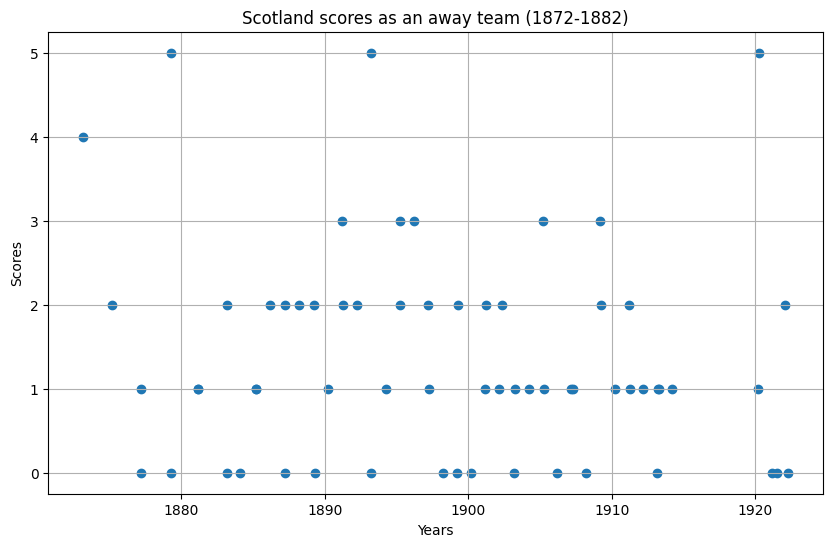

In [4]:
def dots() -> None:
    data_frame['date'] = pandas.to_datetime(data_frame['date'])
    filtered_df = data_frame[(data_frame['away_team'] == 'Scotland') 
                             & (data_frame['date'].dt.year >= 1872) 
                             & (data_frame['date'].dt.year <= 1922)]
    plt.figure(figsize=(10,6))
    plt.scatter(filtered_df['date'], filtered_df['home_score'])
    plt.xlabel('Years')
    plt.ylabel('Scores')
    plt.title('Scotland scores as an away team (1872-1882)')
    plt.grid(True)
    plt.show()

dots()

# Plotting a pie chart of percentage of games played by England, Scotland, Wales when playing as a home team

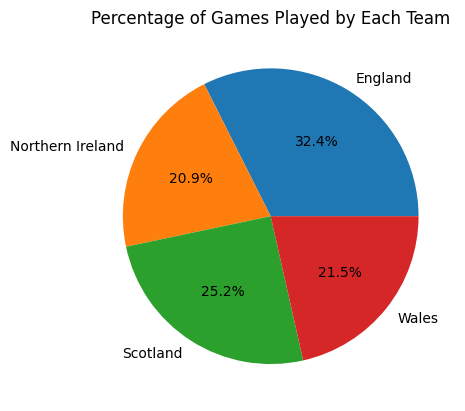

In [16]:
def pie() -> None:
    teams = ['England', 'Scotland', 'Wales', 'Northern Ireland']
    team_games = data_frame[data_frame['home_team'].isin(teams) | 
                            data_frame['away_team'].isin(teams)]

    # Count the number of games played by each team
    home_counts = team_games['home_team'].value_counts()
    away_counts = team_games['away_team'].value_counts()
    team_counts = home_counts.add(away_counts, fill_value=0)
    team_counts = team_counts[team_counts.index.isin(teams)]

    # Plot a pie chart of the game counts
    plt.pie(team_counts, labels=team_counts.index, autopct='%1.1f%%')
    plt.title('Percentage of Games Played by Each Team')
    plt.show()

pie()

# Plotting a bar chart of the number of games played by England, Scotland, Wales when playing as a home team between 

/var/folders/df/v02b0vfx2tbc5plrdx4v6gk80000gn/T/ipykernel_91274/206599659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = pandas.to_datetime(filtered_df['date']).dt.year


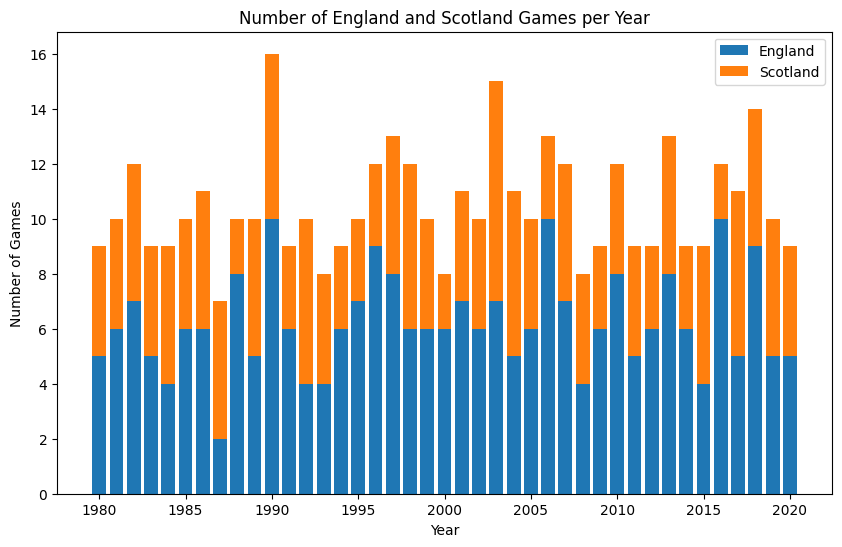

In [6]:
def bar():
    filtered_df = data_frame[data_frame['home_team'].isin(['England', 'Scotland'])]
    filtered_df['year'] = pandas.to_datetime(filtered_df['date']).dt.year
    games_per_year = filtered_df.groupby(['year', 'home_team']).size().unstack()
    years = range(1980, 2021)
    england_counts = []
    scotland_counts = []

    for year in years:
        england_count = games_per_year.loc[year, 'England'] if year in games_per_year.index else 0
        scotland_count = games_per_year.loc[year, 'Scotland'] if year in games_per_year.index else 0
        england_counts.append(england_count)
        scotland_counts.append(scotland_count)

    plt.figure(figsize=(10, 6))
    plt.bar(years, england_counts, label='England')
    plt.bar(years, scotland_counts, bottom=england_counts, label='Scotland')
    plt.xlabel('Year')
    plt.ylabel('Number of Games')
    plt.title('Number of England and Scotland Games per Year')
    plt.legend()
    plt.show()

bar()

/var/folders/df/v02b0vfx2tbc5plrdx4v6gk80000gn/T/ipykernel_91274/1087414526.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  england_games['date'] = pandas.to_datetime(england_games['date'])


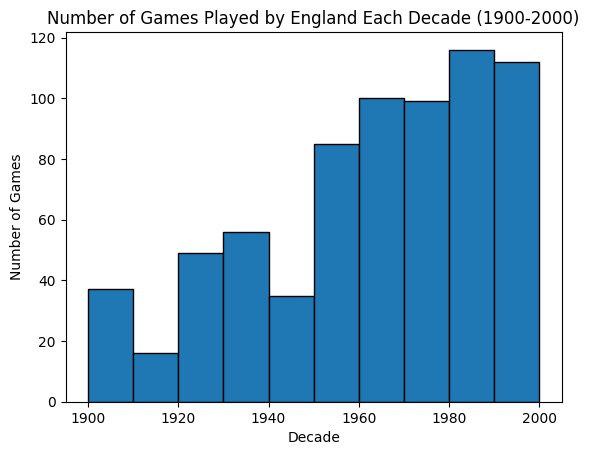

In [13]:
def histogram():
    # Filter the DataFrame to only include games where England was the home or away team
    england_games = data_frame[(data_frame['home_team'] == 'England') 
                               | (data_frame['away_team'] == 'England')]

    # Convert the 'date' column to datetime format
    england_games['date'] = pandas.to_datetime(england_games['date'])

    # Filter the DataFrame to only include games from 1900 to 2000
    england_games = england_games[(england_games['date'].dt.year >= 1900) & (england_games['date'].dt.year < 2000)]

    # Create a new column for the decade
    england_games['decade'] = (england_games['date'].dt.year // 10) * 10

    # Plot a histogram of the game counts
    plt.hist(england_games['decade'], bins=range(1900, 2010, 10), edgecolor='black')
    plt.xlabel('Decade')
    plt.ylabel('Number of Games')
    plt.title('Number of Games Played by England Each Decade (1900-2000)')
    plt.show()


histogram()